C:\Users\Etienne\AppData\Local\Temp\ipykernel_10488\1206120481.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

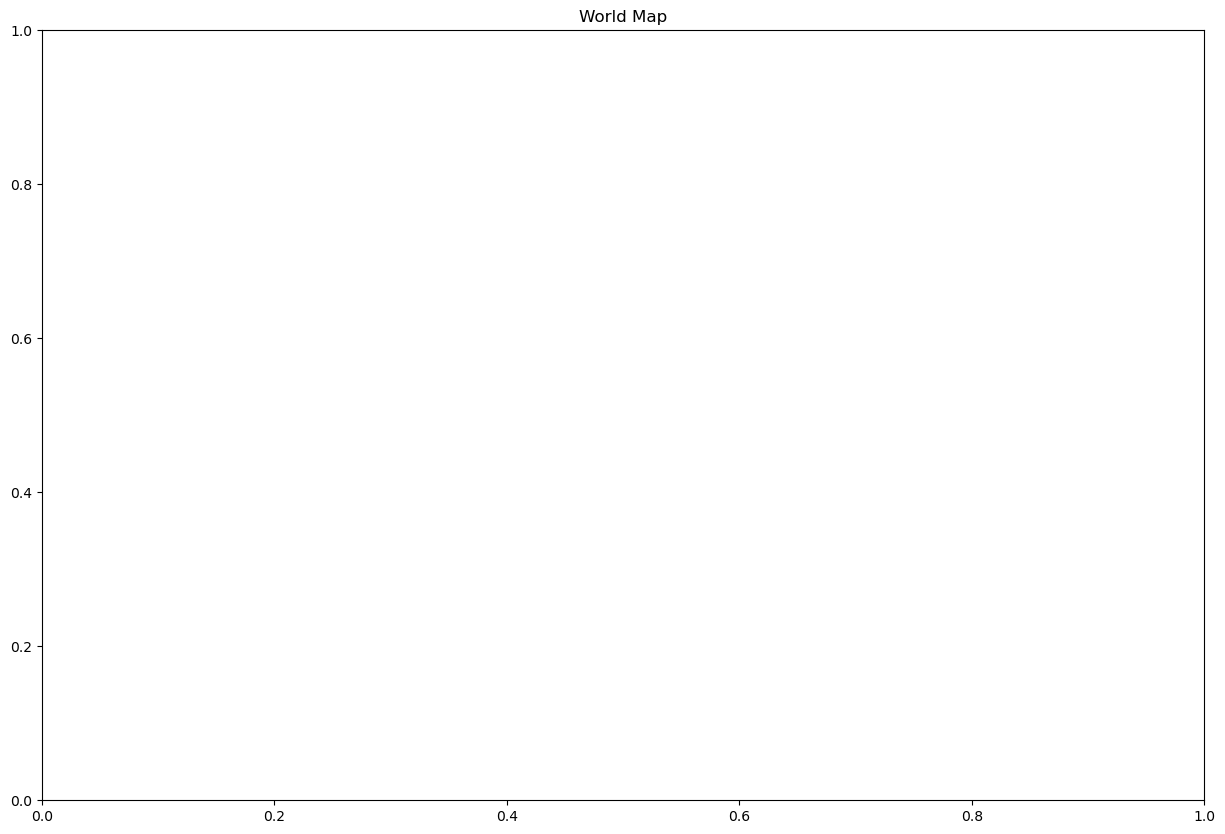

In [1]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt

from utils import data_dir

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load your CSV data
# Replace 'your_data.csv' with the path to your CSV file
wb_urbpop = gpd.read_file(os.path.join(data_dir, 'CY-DATA-Urbpop.csv'))

def plot_year(data, year, myval):
    thisyear_data = data[data['year'] == year]

    # Merge the world map with your data based on the country name
    merged_data = world.merge(thisyear_data, how='left', left_on='name', right_on='country_name')

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    ax.set_title('World Map')

    # Plot the map with colors based on 'myval'
    merged_data.plot(column=myval, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Customize the colorbar
    cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
    sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=merged_data[myval].min(), vmax=merged_data[myval].max()))
    sm._A = []
    fig.colorbar(sm, cax=cax)

    # Show the plot
    plt.show()

plot_year(wb_urbpop, 2015, 'wb_urbpop')